In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### 2d visualization

In [2]:
def visualize2d(image_path, point_path):
    # read points coordinates from txt file
    f = open(point_path, 'r')
    x_start_text = 'X:'
    x_end_text = ','
    y_start_text = 'Y:'
    y_end_text = ';'
    all_points = []
    num_line = 0

    for line in f:
        num_line += 1
        if num_line > 2:
            x_coor = line[line.find(x_start_text) + len(x_start_text): line.find(x_end_text)]
            y_coor = line[line.find(y_start_text) + len(y_start_text): line.find(y_end_text)]
            all_points.append([int(x_coor), int(y_coor)])
            
    print('num of points:', len(all_points))
    
    # visualize the points and image
    plt.figure(figsize=(20, 10))
    plt.imshow(Image.open(image_path), cmap='gray')
    plt.scatter(np.array(all_points)[:, 0], np.array(all_points)[:, 1], c='r', s=10)

num of points: 38


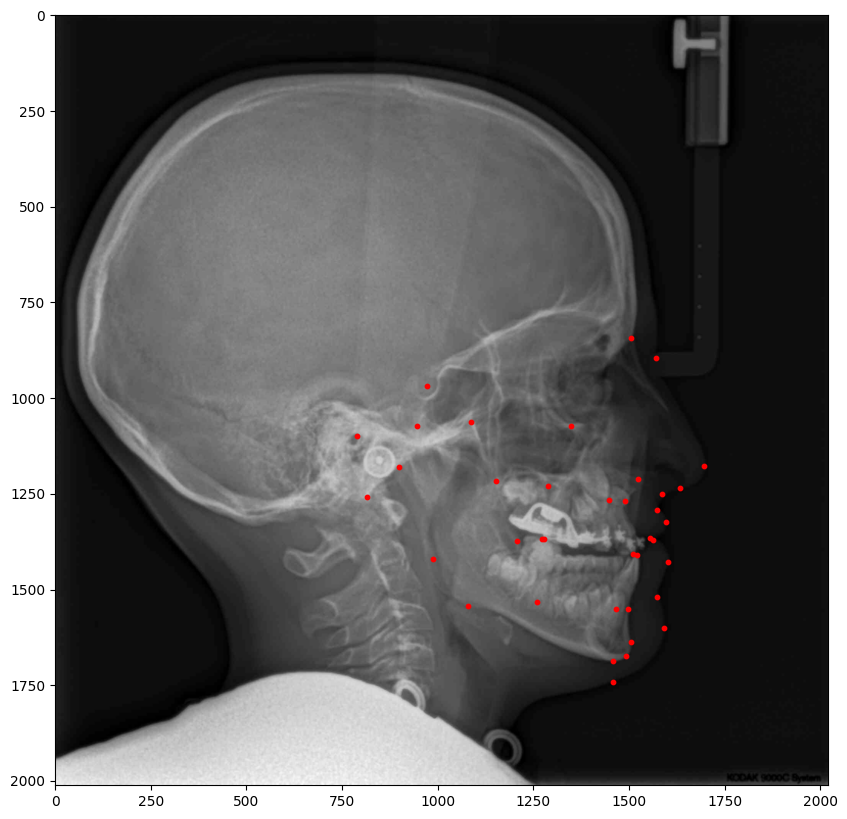

In [3]:
image_path = '../Code_and_sample_dataset/Codes/FRS-KI/Recognition/Preparation/1_Images_WIthout/image1.png'
point_path = '../Code_and_sample_dataset/Codes/FRS-KI/Recognition/Preparation/1_Coordinates_For_Image/image1.txt'
visualize2d(image_path, point_path)

num of points: 1


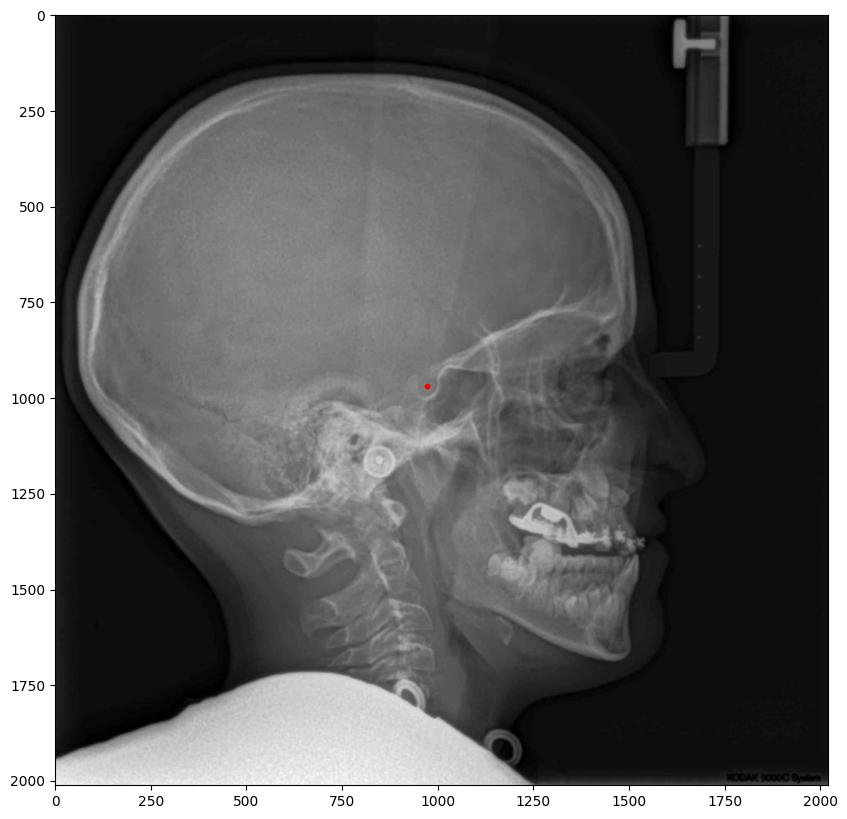

In [5]:
image_path = 'data/S_Point/Images_without/image1.png'
point_path = 'data/S_Point/Coordinates/image1.txt'
visualize2d(image_path, point_path)

### 3d visualization

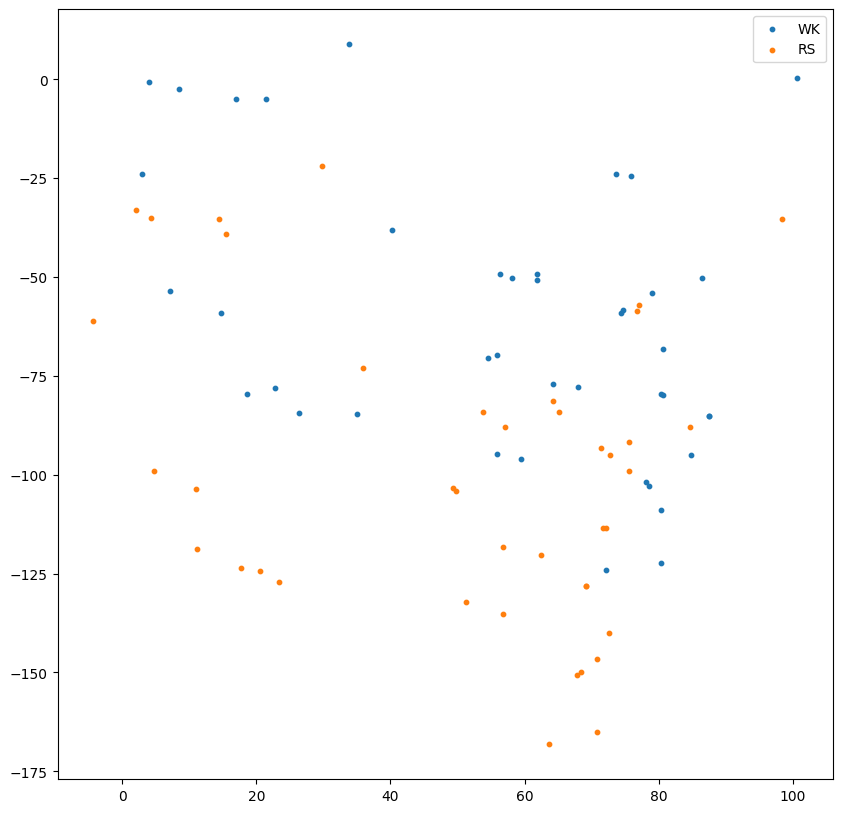

In [75]:
import pandas as pd
df_WK = pd.read_csv('data/data_WK.csv')
transversal_WK = df_WK['transversal']
sagittal_WK = df_WK['sagittal']
vertikal_WK = df_WK['vertikal']

df_RS = pd.read_csv('data/data_RS.csv')
transversal_RS = df_RS['transversal']
sagittal_RS = df_RS['sagittal']
vertikal_RS = df_RS['vertikal']

plt.figure(figsize=(10, 10))
# plt.scatter(transversal_WK, sagittal_WK, s=10, label='WK')
# plt.scatter(transversal_RS, sagittal_RS, s=10, label='RS')
# plt.scatter(transversal_WK, vertikal_WK, s=10, label='WK')
# plt.scatter(transversal_RS, vertikal_RS, s=10, label='RS')

plt.scatter(sagittal_WK, vertikal_WK, s=10, label='WK')
plt.scatter(sagittal_RS, vertikal_RS, s=10, label='RS')

plt.legend()

In [67]:
import pandas as pd
import plotly.express as px

# Create an interactive 3D scatter plot
fig = px.scatter_3d(df_WK, x='transversal', y='sagittal', z='vertikal', text='label')

# Customize the appearance and labels
fig.update_traces(marker=dict(size=2), selector=dict(mode='markers+text'))
fig.update_layout(scene=dict(zaxis_title='Vertical', xaxis_title='Transversal', yaxis_title='Sagittal'))

# Show the plot in the Jupyter Notebook
fig.show()


In [69]:
import pandas as pd
import plotly.express as px

# Create an interactive 3D scatter plot
fig = px.scatter_3d(df_WK, x='transversal', y='sagittal', z='vertikal', text='label')

# Customize the appearance and labels for the data points
fig.update_traces(marker=dict(size=2), selector=dict(mode='markers+text'))
fig.update_layout(scene=dict(zaxis_title='Vertical', xaxis_title='Transversal', yaxis_title='Sagittal'))

# Add the x, y, and z axes as lines or vectors
# You can customize the appearance of these axes as needed
x_axis = dict(
    type='scatter3d',
    x=[0, df_WK['transversal'].max()],
    y=[0, 0],
    z=[0, 0],
    mode='lines',
    line=dict(color='red', width=3),
    name='transversal'
)

y_axis = dict(
    type='scatter3d',
    x=[0, 0],
    y=[0, df_WK['sagittal'].max()],
    z=[0, 0],
    mode='lines',
    line=dict(color='green', width=3),
    name='sagittal'
)

z_axis = dict(
    type='scatter3d',
    x=[0, 0],
    y=[0, 0],
    z=[0, df_WK['vertikal'].max()],
    mode='lines',
    line=dict(color='blue', width=3),
    name='vertikal'
)

# Add the axes to the figure
fig.add_trace(x_axis)
fig.add_trace(y_axis)
fig.add_trace(z_axis)

# Show the plot in the Jupyter Notebook
fig.show()


In [56]:
def shift(points, scale, delta):
    new_points = []
    for point in points:
        new_points.append(point * scale + delta)
    return new_points

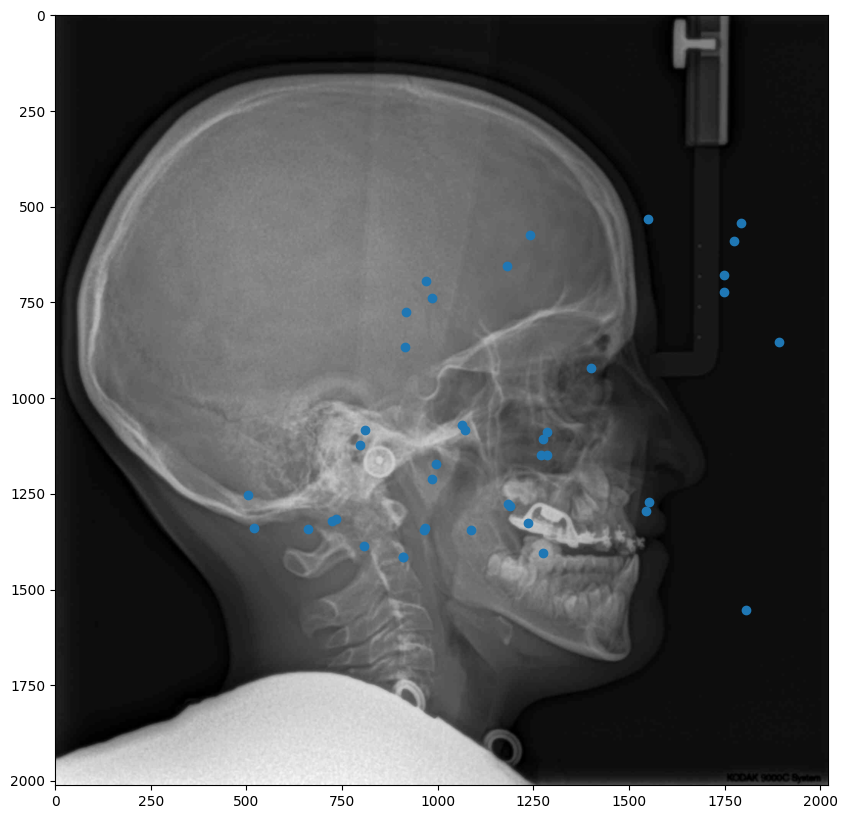

In [86]:
from PIL import Image
image_path = 'data/2D/S_Point/Images_without/image1.png'
img = Image.open(image_path)


plt.figure(figsize=(10, 10))
# plt.scatter(shift(vertikal, 10.46, 1800), shift(sagittal, 10.46, 500))
# plt.scatter(sagittal, transversal)
# plt.scatter(transversal, sagittal)
# plt.scatter(sagittal, vertikal)
# plt.scatter(vertikal, sagittal)
plt.imshow(img, cmap='gray')

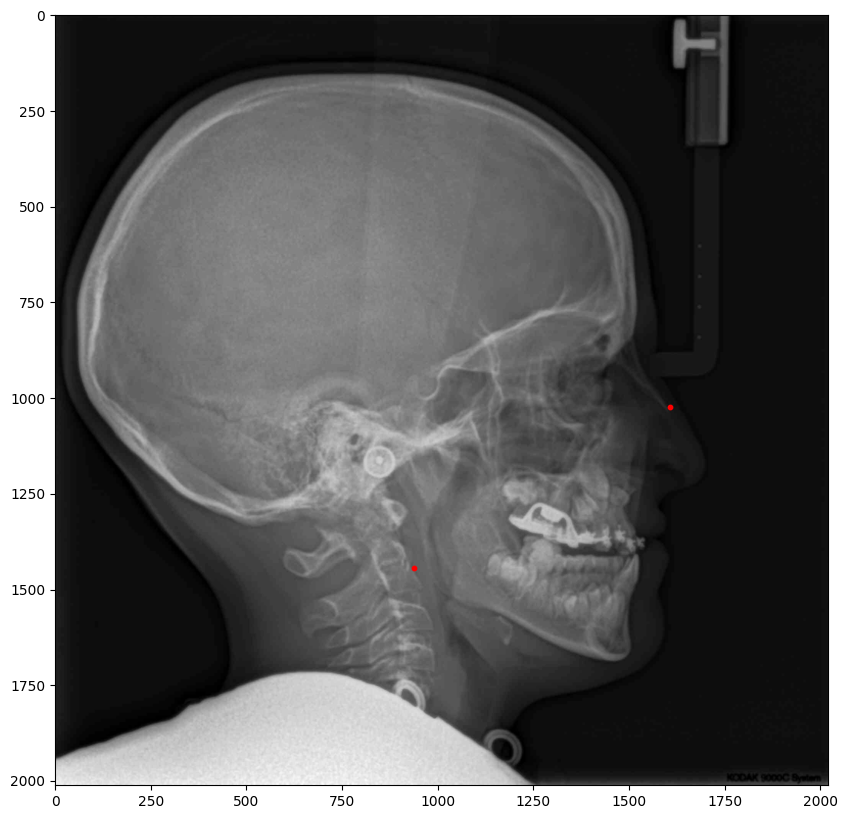

In [100]:
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')
s_x = [33.8289, 100.665]
s_y = [8.88653, 0.475684]
plt.scatter(shift(s_x, 10, 600), shift(s_y, , 1000), c='r', s=10)

In [101]:
import random
import csv

# Your original data
original_data = [
    ["name", "X", "Y", "Z"],
    ["image1", 971, 968, 5],
    ["image2", 989, 902, 4.9],
    ["image3", 933, 990, 5.1],
    ["image4", 971, 968, 5],
    ["image5", 989, 902, 4.92]
]

# Number of additional data points you want
desired_data_points = 100

# Generate additional data points with noise
for i in range(desired_data_points - len(original_data) + 1):
    new_data_point = ["image" + str(i + 6)]  # Assuming you want to continue with image6, image7, etc.

    # Add noise to X, Y, and Z values
    for j in range(3):
        noise = random.uniform(-5, 5)
        original_value = original_data[i % len(original_data) + 1][j + 1]
        new_value = original_value + noise
        new_data_point.append(round(new_value, 2))

    original_data.append(new_data_point)

# Write the new data to a CSV file
with open('generated_data.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    for row in original_data:
        csv_writer.writerow(row)


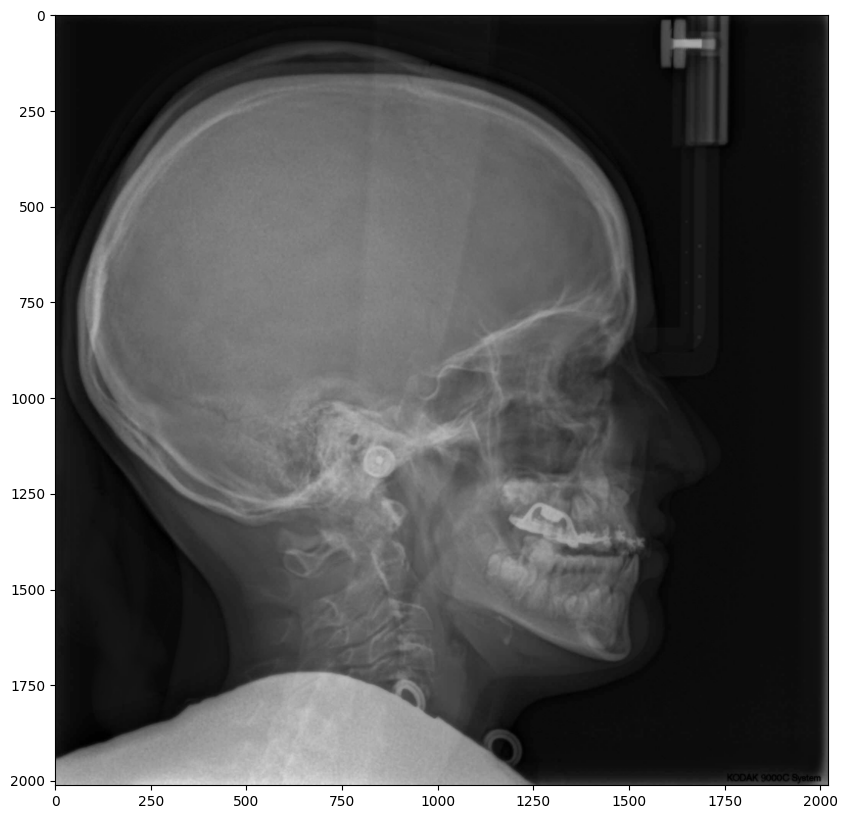

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two images
image1 = cv2.imread('data/2D/S_Point/Images_without/image1.png')
image2 = cv2.imread('data/2D/S_Point/Images_without/image5.png')

# Ensure both images have the same dimensions
if image1.shape != image2.shape:
    raise ValueError("Both images must have the same dimensions")

# Interpolation parameter (0.0 for image1, 1.0 for image2, values in between for blending)
alpha = 0.3  # You can adjust this parameter

# Perform linear interpolation between the two images
interpolated_image = cv2.addWeighted(image1, 1 - alpha, image2, alpha, 0)


plt.figure(figsize=(10, 10))
plt.imshow(interpolated_image, cmap='gray')

## visualize the dummy data, with random noise on coordinates

In [119]:
import pandas  as pd
import os 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

datapath = 'dummydata/S_Point/fake_2d.csv'

def visualize2d(data_path, index, img_name_column='name', img_dir='dummydata/images/2d'):
    data = pd.read_csv(datapath)
    img_name = data[img_name_column]
    img_path = os.path.join(img_dir, img_name[index]+'.png')
    X = data.loc[index, 'X']
    Y = data.loc[index, 'Y']
    print('X:', X, 'Y:', Y)
    
    # visualize the points and image
    plt.figure(figsize=(10, 10))
    plt.imshow(Image.open(img_path), cmap='gray')
    plt.scatter(X, Y, c='r', s=10)


X: 928.53 Y: 976.46


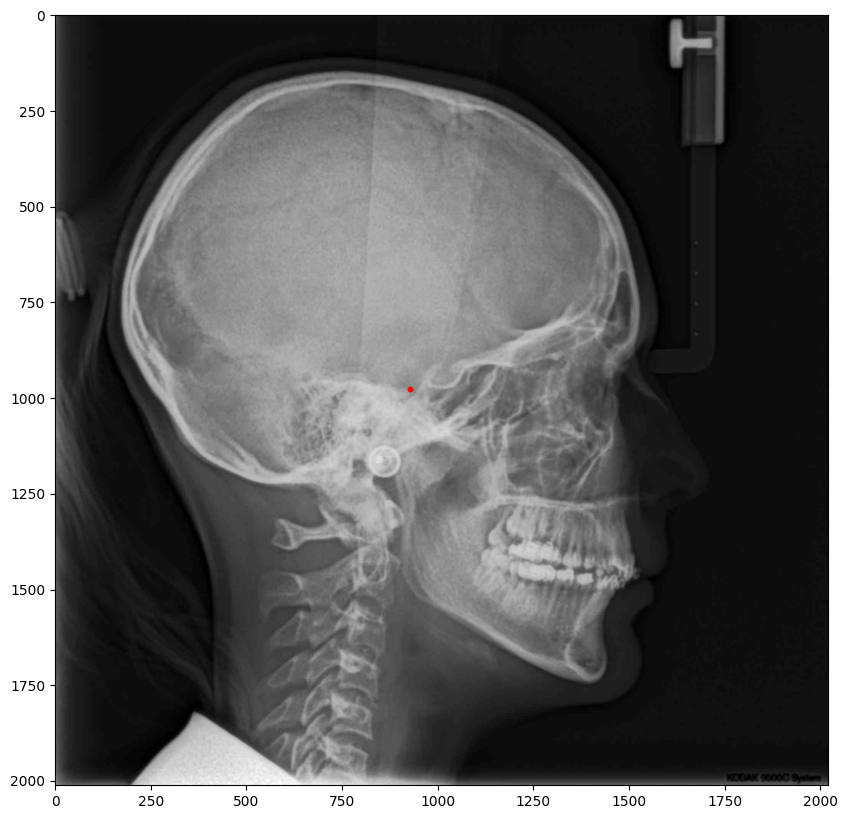

In [150]:
visualize2d(datapath, 45)

In [9]:
# test
import torch
import numpy as np
pred = torch.tensor([[212, 211],
        [235, 238],
        [212, 211],
        [212, 211],
        [247, 252],
        [235, 238],
        [235, 238]])

target = torch.tensor([[228, 198],
        [243, 279],
        [252, 221],
        [248, 213],
        [176, 311],
        [246, 272],
        [240, 262]])



In [14]:
delta

tensor([[-16,  13],
        [ -8, -41],
        [-40, -10],
        [-36,  -2],
        [ 71, -59],
        [-11, -34],
        [ -5, -24]])

In [15]:
delta = pred - target
delta_x = delta[:, 0]
delta_y = delta[:, 1]
D = torch.sqrt(delta_x ** 2 + delta_y ** 2)
D.mean()



tensor(41.7486)

In [31]:
delta_x

tensor([-16,  -8, -40, -36,  71, -11,  -5])

In [36]:
torch.abs(delta_x).float().mean()

tensor(26.7143)

In [23]:
def MRE(pred, target):
    delta = pred - target
    delta_x = delta[:, 0]
    delta_y = delta[:, 1]
    D = torch.sqrt(delta_x ** 2 + delta_y ** 2)
    print(D)
    std = D.std().item()
    return D.mean().item(), std

MRE(pred, target)

tensor([20.6155, 41.7732, 41.2311, 36.0555, 92.3147, 35.7351, 24.5153])


(41.74863052368164, 23.697269439697266)

In [ ]:
def StandardDeviation(pred, target):
    delta = pred - target
    delta_x = delta[:, 0]
    delta_y = delta[:, 1]
    D = torch.sqrt(delta_x ** 2 + delta_y ** 2)
    return D.std().item()

In [26]:
a = []
b = [20.6155, 41.7732, 41.2311, 36.0555, 92.3147, 35.7351, 24.5153]
a + b + b

[20.6155,
 41.7732,
 41.2311,
 36.0555,
 92.3147,
 35.7351,
 24.5153,
 20.6155,
 41.7732,
 41.2311,
 36.0555,
 92.3147,
 35.7351,
 24.5153]